In [1]:
# data preprocessing : 데이터를 분석에 사용할때 성능이 더 좋게 나오도록 데이터를 수정하거나 형태를 변형하는 작업
#원시 데이터> 데이터 전처리 단계>데이터 분석 (머신러닝 모델)(X)> 분석목적 (설명, 군집화,예측(회귀, 분류),추천)(y)
#데이터 전처리 종류: 데이터 클리닝(결측치 처리, 틀린값 처리), 스케일링, 이상치 처리, 데이터 변환

In [2]:
#데이터 클리닝(결측치 처리, 틀린값 처리)
# 결측치 처리(nan(not a number)표시가 되어있는 데이터 처리)
#1) 결측치가 포함된 샘플 버림
#2)결측치 적절한 값으로 대체
#3)결측치 처리를 다음 분석 단계로 넘어간다. 그대로 내버려둠

#틀린값 처리
#1) 틀린 값이 포함된 샘플 버림
#2)틀린 값 적절한 값으로 대체
#3)틀린 값 처리를 다음 분석 단계로 넘어간다. 그대로 내버려둠


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#이미지 고질화
%matplotlib inline
%config Inlinebackend.figure_format ='retina'

In [24]:
import seaborn as sns

In [25]:
##실습 데이터 ##
#1)키와 몸무게 데이터 생성, 평균 170cm, 65kg, 표준편차 4cm,5kg

In [26]:
n_samples=1000
height=4*np.random.randn(n_samples).round(2)+170
weight=5*np.random.randn(n_samples).round(2)+65
df_raw=pd.DataFrame({"height":height, "weight":weight})
df_raw[:5]

,height,weight
0,169.64,66.15
1,170.12,64.70
2,168.00,64.05
3,170.72,60.90
4,167.48,56.05


In [31]:
#사본 사용(원본 백업)
df=df_raw.copy

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

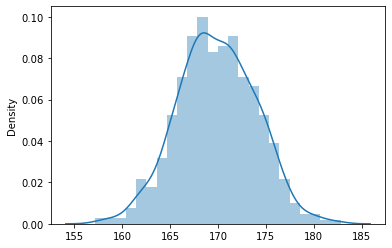

In [32]:
#샘플의 확률 분포 근사 그래프 보기
sns.distplot(df_raw["height"].values)

In [34]:
#결측치 처리 실습(np.isnull()사용, 결측치 치환)
df_raw[:5]

,height,weight
0,169.64,66.15
1,170.12,64.70
2,168.00,64.05
3,170.72,60.90
4,167.48,56.05


In [35]:
#임의의 값 하나를 결측치로 변경
df_raw['weight'][2]=np.nan
df_raw[:5]

,height,weight
0,169.64,66.15
1,170.12,64.70
2,168.00,NaN
3,170.72,60.90
4,167.48,56.05


In [37]:
#컬럼별 결측치 갯수 보기
df_raw.isnull().sum()
df_raw.isnull()

,height,weight
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [38]:
#결측치가 있는 행(샘플) 삭제하기
df2=df_raw.dropna()
print(df2.shape)
df2[:5]

(999, 2)


,height,weight
0,169.64,66.15
1,170.12,64.70
3,170.72,60.90
4,167.48,56.05
5,164.80,61.45


In [42]:
#결측치를 다른 값으로 대체하기(아래는 몸무게 칼럼의 평균치로 대체한 예)
df3=df_raw.fillna(df_raw['weight'].mean())
print(df3.shape)
print(df_raw['weight'].mean())
df3[:5]

(1000, 2)
64.84734734734741


,height,weight
0,169.64,66.150000
1,170.12,64.700000
2,168.00,64.847347
3,170.72,60.900000
4,167.48,56.050000


In [43]:
#결측칠르 0으로 대체하는 경우
df_raw.fillna(0)[:5]

,height,weight
0,169.64,66.15
1,170.12,64.70
2,168.00,0.00
3,170.72,60.90
4,167.48,56.05


In [45]:
#결측치를 바로 이전 값으로 대체하는 경우 (forward fill)
df_raw.fillna(method="ffill")[:5]

,height,weight
0,169.64,66.15
1,170.12,64.70
2,168.00,64.70
3,170.72,60.90
4,167.48,56.05


In [46]:
##스케일링(확률 분포 모양 안바뀜)
#표준 스케일링 (z=(x-평균)/표준편차)

In [48]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df_raw[['h_sc','w_sc']]=scale.fit_transform(df_raw[['height','weight']])
df_raw[:5]

,height,weight,h_sc,w_sc
0,169.64,66.15,-0.054920,0.250791
1,170.12,64.70,0.063420,-0.028368
2,168.00,NaN,-0.459248,NaN
3,170.72,60.90,0.211346,-0.759957
4,167.48,56.05,-0.587450,-1.693695


In [49]:
scale.mean_, scale.scale_

(array([169.86276   ,  64.84734735]), array([4.05610517, 5.19417413]))

In [50]:
scale.mean_[0]

169.86276

In [51]:
scale.inverse_transform(df_raw[["h_sc","w_sc"]])[:5]

array([[169.64,  66.15],
       [170.12,  64.7 ],
       [168.  ,    nan],
       [170.72,  60.9 ],
       [167.48,  56.05]])

<AxesSubplot:ylabel='Density'>

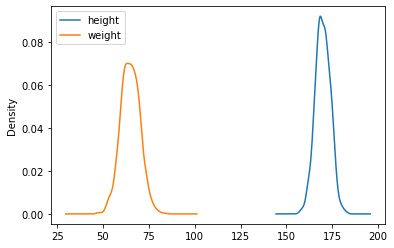

In [52]:
#원래 키, 몸무게의 데이터의 확률 분포 보기(kernel density estimate 함수 사용(kde))
df_raw[["height","weight"]].plot.kde()

(array([ 2.,  3.,  3.,  7., 21., 17., 26., 50., 72., 77., 99., 97., 86.,
        97., 83., 66., 65., 59., 26., 23.,  8.,  5.,  4.,  2.,  2.]),
 array([157.16  , 158.1872, 159.2144, 160.2416, 161.2688, 162.296 ,
        163.3232, 164.3504, 165.3776, 166.4048, 167.432 , 168.4592,
        169.4864, 170.5136, 171.5408, 172.568 , 173.5952, 174.6224,
        175.6496, 176.6768, 177.704 , 178.7312, 179.7584, 180.7856,
        181.8128, 182.84  ]),
 <BarContainer object of 25 artists>)

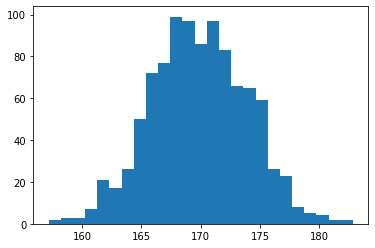

In [53]:
plt.hist(df_raw.height, bins=25)

<AxesSubplot:ylabel='Density'>

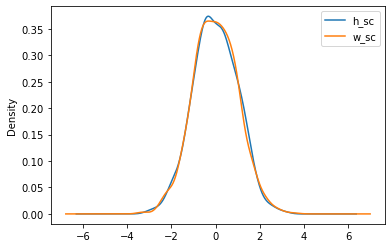

In [54]:
#표준 스케일링된 데이터의 확률 분포 보기- 정규분포로 생성
df_raw[["h_sc","w_sc"]].plot.kde()

In [55]:
## Min-Max 스케일링 (데이터의 최소값이 0, 최대값이 1이 되도록 조정)
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_raw[['h_mims','w_mima']]=minmax.fit_transform(df_raw[['height','weight']])
df_raw[:5]

,height,weight,h_sc,w_sc,h_mims,w_mima
0,169.64,66.15,-0.054920,0.250791,0.485981,0.520280
1,170.12,64.70,0.063420,-0.028368,0.504673,0.479720
2,168.00,NaN,-0.459248,NaN,0.422118,NaN
3,170.72,60.90,0.211346,-0.759957,0.528037,0.373427
4,167.48,56.05,-0.587450,-1.693695,0.401869,0.237762


<AxesSubplot:ylabel='Density'>

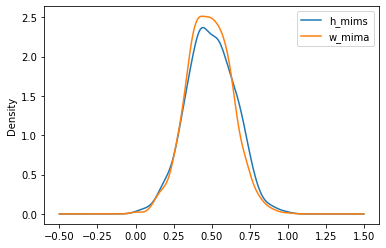

In [57]:
#min-max 스케일링 된 데이터의 확률 분포
df_raw[["h_mims","w_mima"]].plot.kde()

In [58]:
#이상치가 있을 시, 두 스케일링 결과 값의 변화 정도가 크게 다르다

In [59]:
height_1=height.copy()
height_1[0]=200

In [60]:
df_raw["height_1"]=height_1
df_raw[:3]

,height,weight,h_sc,w_sc,h_mims,w_mima,height_1
0,169.64,66.15,-0.054920,0.250791,0.485981,0.52028,200.00
1,170.12,64.70,0.063420,-0.028368,0.504673,0.47972,170.12
2,168.00,NaN,-0.459248,NaN,0.422118,NaN,168.00


In [64]:
#이상치가 포함된 데이터(컬럼)에 표준 스케일링을 적용
df_raw['h_1_sc']=scale.fit_transform(df_raw[['height_1']])
df_raw[:3]

,height,weight,h_sc,w_sc,h_mims,w_mima,height_1,h_1_sc
0,169.64,66.15,-0.054920,0.250791,0.485981,0.52028,200.00,7.226034
1,170.12,64.70,0.063420,-0.028368,0.504673,0.47972,170.12,0.054454
2,168.00,NaN,-0.459248,NaN,0.422118,NaN,168.00,-0.454373


In [66]:
#이상치가 있는 데이터에 min-max 스케일링 적용
df_raw['h_1_mima']=minmax.fit_transform(df_raw[['height_1']])
df_raw[:3]

,height,weight,h_sc,w_sc,h_mims,w_mima,height_1,h_1_sc,h_1_mima
0,169.64,66.15,-0.054920,0.250791,0.485981,0.52028,200.00,7.226034,1.000000
1,170.12,64.70,0.063420,-0.028368,0.504673,0.47972,170.12,0.054454,0.302521
2,168.00,NaN,-0.459248,NaN,0.422118,NaN,168.00,-0.454373,0.253035


<AxesSubplot:ylabel='Density'>

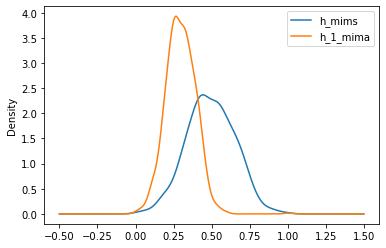

In [68]:
# 이상치 하나 떄문에 min-max 스케일링 데이터의 다른 값들이 크게 달라짐.
#크거나 작은 단 한개의 샘플추가로도 다른 샘플들의 값이 크게 달라질수 있음
#여기서는 200인 키의 값이 1로 환산
df_raw[['h_mims','h_1_mima']].plot.kde()

In [69]:
## 이상치 처리##
#이상치 처리의 목적 1) 이상치를 제거하여 데이터 분석의 정확도를 높이려는 경우(중요)
#이상치 처리의 목적 2)이상치를 찾는 것 자체가 목적인 경우
#ex)크레딧 카드 사용 기록시 비정상적인 행동 발견 할시,

<AxesSubplot:>

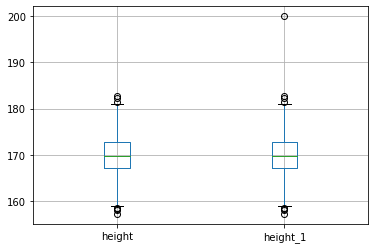

In [70]:
#이상치가 없는 경우와 있는 경우의 박스플롯
df_raw[["height","height_1"]].boxplot()

<AxesSubplot:>

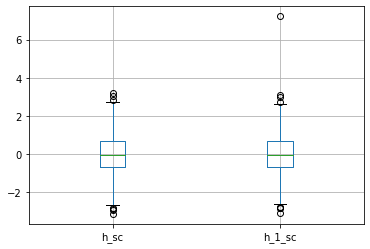

In [71]:
# 스케일링된 데이터를 비교하기 (키 2m인 사람은 7시그마 밖에 존재: 4cm*7= 28cm)
df_raw[["h_sc","h_1_sc"]].boxplot()

In [72]:
## 데이터 변환 ## 
#로그변환>어떤 변수는 로그를 취해야 입출력 관계에서 선형적인 변화(효과)를 표현하는 경우
#예: 돈, 생물학적 자극과 반응 관계(청각, 미각, 후각, 압력 등)
#데이터 분석에서는 입출력 관계가 선형적일때 가장 잘 예측(선형적일수록 예측이 잘 된다)

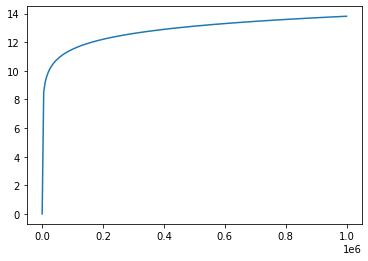

In [74]:
#돈의 수입과 만족도의 관계는 대체로 로그 함수를 따른다( 생물학적 반응)
#(해석)로그 함수의 기울기는 1/x이다. 즉, 만족도 증가는 현재 가진 돈의 크기에 반비례 함
x=np.linspace(1,1000000,200)
y=np.log(x)
plt.plot(x,y)

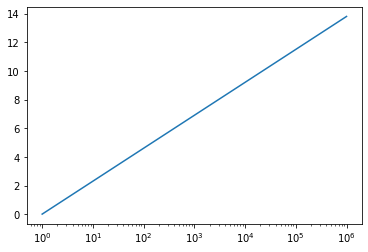

In [75]:
# x축을 로그 스케일로 그리면 (로그를 취하면) 입출력 관계가 선형적이 된다
plt.xscale('log')
plt.plot(x,y)

In [76]:
## log-normal 분포##
#어떤 값에 로그를 취하면 정규분폴르 갖는 특성의 데이터 (예: 국가별 수출액 분포)

In [77]:
#키의 등급 나누기
#키를 세 등급으로 나누는 방법 (표준편차를 기준으로)
df=df_raw
df.loc[df['height']>=174, 'tall']='large'
df.loc[(df['height']<174)&(df['height']>=166),'tail']='standard'
df.loc[df['height']<166,'tail']='small'
df

,height,weight,h_sc,w_sc,h_mims,w_mima,height_1,h_1_sc,h_1_mima,tall,tail
0,169.64,66.15,-0.054920,0.250791,0.485981,0.520280,200.00,7.226034,1.000000,NaN,standard
1,170.12,64.70,0.063420,-0.028368,0.504673,0.479720,170.12,0.054454,0.302521,NaN,standard
2,168.00,NaN,-0.459248,NaN,0.422118,NaN,168.00,-0.454373,0.253035,NaN,standard
3,170.72,60.90,0.211346,-0.759957,0.528037,0.373427,170.72,0.198462,0.316527,NaN,standard
4,167.48,56.05,-0.587450,-1.693695,0.401869,0.237762,167.48,-0.579179,0.240896,NaN,standard
...,...,...,...,...,...,...,...,...,...,...,...
995,171.68,70.65,0.448026,1.117146,0.565421,0.646154,171.68,0.428874,0.338936,NaN,standard
996,174.12,70.00,1.049588,0.992006,0.660436,0.627972,174.12,1.014505,0.395892,large,NaN
997,168.64,60.75,-0.301462,-0.788835,0.447040,0.369231,168.64,-0.300765,0.267974,NaN,standard
998,172.56,69.45,0.664983,0.886118,0.599688,0.612587,172.56,0.640085,0.359477,NaN,standard


In [79]:
#카테고리 데이터의 구성비
df['tail'].value_counts()

standard    673
small       167
Name: tail, dtype: int64

In [80]:
# 구성 비율(%)
df['tail'].value_counts()*100/len(df)

standard    67.3
small       16.7
Name: tail, dtype: float64

In [81]:
##원 핫 인코딩
#하나의 변수만 1로 변경
#카테고리 변수의 원핫 인코딩(데이터 프레임을 만든다)
df_tail=pd.get_dummies(df['tail'])
df_tail[:5]

,small,standard
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [82]:
#원핫 인코딩된 데이터 프레임 합치기 (가로방향)
df_all=pd.concat((df,df_tail),axis=1)
df_all[:5]

,height,weight,h_sc,w_sc,h_mims,w_mima,height_1,h_1_sc,h_1_mima,tall,tail,small,standard
0,169.64,66.15,-0.054920,0.250791,0.485981,0.520280,200.00,7.226034,1.000000,NaN,standard,0,1
1,170.12,64.70,0.063420,-0.028368,0.504673,0.479720,170.12,0.054454,0.302521,NaN,standard,0,1
2,168.00,NaN,-0.459248,NaN,0.422118,NaN,168.00,-0.454373,0.253035,NaN,standard,0,1
3,170.72,60.90,0.211346,-0.759957,0.528037,0.373427,170.72,0.198462,0.316527,NaN,standard,0,1
4,167.48,56.05,-0.587450,-1.693695,0.401869,0.237762,167.48,-0.579179,0.240896,NaN,standard,0,1


In [84]:
## 최종 사용 데이터
#모든 컬럼명 보기
df_all.columns

Index(['height', 'weight', 'h_sc', 'w_sc', 'h_mims', 'w_mima', 'height_1',
       'h_1_sc', 'h_1_mima', 'tall', 'tail', 'small', 'standard'],
      dtype='object')

In [86]:
#분석에 사용할 컬럼들을 선택
x=df_all[['h_sc','w_sc','small','standard']]
x[:5]

,h_sc,w_sc,small,standard
0,-0.054920,0.250791,0,1
1,0.063420,-0.028368,0,1
2,-0.459248,NaN,0,1
3,0.211346,-0.759957,0,1
4,-0.587450,-1.693695,0,1
